# dimantion reducing by pca :


# Objective:
recognize  the fashion object   on Mnist dataset with the help of PCA and GridSearchCV
https://www.kaggle.com/zalando-research/fashionmnist

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import random
  
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')


dataset.head()


,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [2]:
#remove NAN
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [3]:
dataset = dataset[[
    'ICU_mortality',
 'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
dataset.shape

(976, 64)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['active problems'] = le.fit_transform(dataset['active problems'].astype(str))
dataset['background problems'] = le.fit_transform(dataset['background problems'].astype(str))
dataset['gender'] = le.fit_transform(dataset['gender'].astype(str))
dataset['feeding'] = le.fit_transform(dataset['feeding'].astype(str))
dataset['LOS_Group'] = le.fit_transform(dataset['feeding'].astype(str))

In [5]:
x = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

## 4. Feature Scaling:
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

### Standardization
In machine learning, we can handle various types of data, e.g. audio signals and pixel values for image data, and this data can include multiple dimensions. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and neural networks. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

## Standard Scaler

##  $$x'= \frac{x - mean(x)}{\sigma}$$


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)


StandardScaler()

In [7]:
x_train_scaler = scaler.transform(x)

In [13]:
from sklearn import model_selection
seed = 1
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors",
         "Decision Tree",
         "Random Forest", 
         #"AdaBoost",
         # "SVM Linear",
        "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
   # AdaBoostClassifier(),
   # SVC(kernel = 'linear'), 
    LogisticRegression(n_jobs = -1)

]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train_scaler[0:8000 ], y[0:8000 ], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Nearest Neighbors: 0.737745 (0.035282)
Decision Tree: 0.645392 (0.031579)
Random Forest: 0.759236 (0.020865)
Logistic Regression: 0.753082 (0.022596)


## 5. Dimentionality Reduction
Having too many features in the training set can make the training process extremely slow and makes it unlikely to get a good solution.
In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

## Principal component analysis (PCA)
The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized.

### Ploting the relation between the Variance and the Dimensions

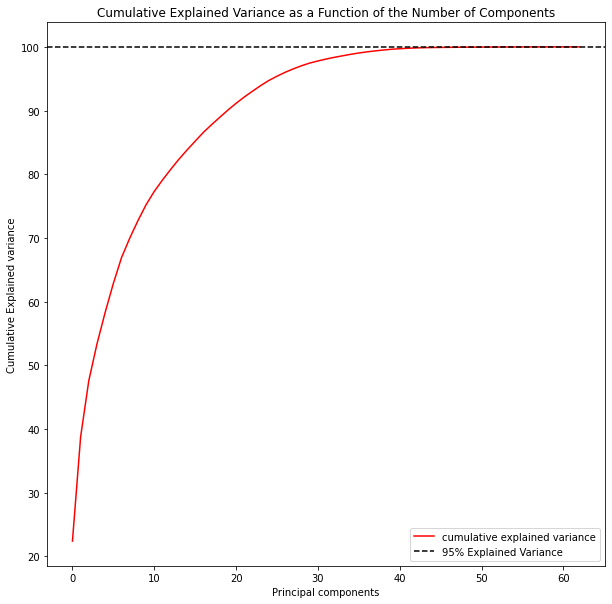

In [9]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_scaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 100, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

This curve quantifies how much of the total, 785-dimensional variance is contained within the first N components. 
For example, we see that  the first 100 components contain approximately 90% of the variance, 
while you need around 600 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance)
and that we'd need about 100 components to retain 90% of the variance.
Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present 
in multiple observations.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(0.999) 
pca.fit(x_train_scaler)

x_train_pca = pca.transform(x_train_scaler)



In [90]:
train=pd.concat([pd.DataFrame(x_train_pca),y],axis=1)


In [91]:
train=train.iloc[:975,]
train.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,ICU_mortality
0,6.507584,1.229608,3.190237,-0.553391,0.871079,0.377609,-1.049099,2.084738,1.899243,-0.574213,...,-0.402253,0.139637,-0.370247,-0.038923,-0.001697,0.018418,-0.015608,-0.113434,-0.013686,0.0
1,-0.347942,-2.695771,-0.129913,1.249309,1.788557,-0.862104,0.309911,0.121996,-1.586013,0.131058,...,-0.141196,-0.287450,-0.189287,0.162532,-0.007896,0.090990,0.082331,-0.226100,-0.107936,0.0
2,-2.907528,4.745350,1.166188,3.038184,-1.997738,-1.735980,6.372877,-2.608954,0.689010,-5.165118,...,-1.034072,0.004012,-0.120608,0.075416,-0.171892,0.097710,0.134345,-0.008937,0.024165,0.0
3,3.619596,-1.151234,5.326175,0.745470,-1.465736,-0.149709,0.744327,1.314350,-0.716199,0.039095,...,-0.073957,0.525994,-0.126212,-0.559477,0.117427,0.112826,-0.133924,0.084260,-0.117991,0.0
4,2.576689,-0.486206,0.684148,-2.055802,1.925728,1.631631,2.501827,-0.479897,-0.479069,0.879594,...,-0.384894,-0.030231,0.276641,0.048594,-0.156466,-0.178464,-0.198951,-0.095471,0.096221,0.0


In [79]:
from pycaret.classification import *
model_setup = setup(data=dataset, target='ICU_mortality', data_split_stratify = True,fix_imbalance=True)

,Description,Value
0,session_id,4127
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 64)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [80]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7409,0.6599,0.2636,0.4449,0.3288,0.1809,0.1918,0.1060
et,Extra Trees Classifier,0.7409,0.6648,0.2077,0.4100,0.2730,0.1388,0.1502,0.0890
lightgbm,Light Gradient Boosting Machine,0.7307,0.6231,0.2324,0.4097,0.2951,0.1426,0.1530,0.0640
gbc,Gradient Boosting Classifier,0.7117,0.6509,0.2562,0.3670,0.3000,0.1253,0.1297,0.1790
qda,Quadratic Discriminant Analysis,0.6923,0.5175,0.1305,0.2221,0.1192,0.0030,-0.0022,0.0120
ada,Ada Boost Classifier,0.6896,0.6357,0.3537,0.3580,0.3532,0.1502,0.1513,0.0720
dt,Decision Tree Classifier,0.6458,0.5399,0.3360,0.2946,0.3123,0.0766,0.0769,0.0230
nb,Naive Bayes,0.6308,0.5987,0.4397,0.3331,0.3590,0.1255,0.1287,0.0090
lr,Logistic Regression,0.5871,0.5941,0.5184,0.2940,0.3739,0.0998,0.1102,0.1060
lda,Linear Discriminant Analysis,0.5798,0.5815,0.5048,0.2873,0.3650,0.0858,0.0943,0.0120


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4127, verbose=0,
                       warm_start=False)


In [85]:
model = create_model("knn")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7647,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7647,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7647,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7647,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7647,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7647,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.7500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


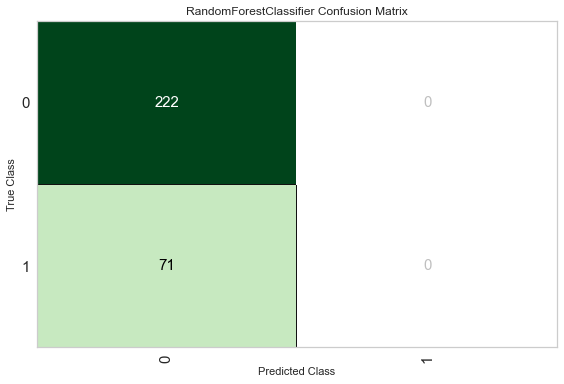

In [86]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# Logistic Regression tunning

### GridSearch Cross Validation
In machine learning, two tasks are commonly done at the same time in data pipelines: cross validation and (hyper)parameter tuning. Cross validation is the process of training learners using one set of data and testing it using a different set. Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.

In [92]:
x_train_pca.shape

(976, 45)

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# making skeletal model
logistic_regression = LogisticRegression(n_jobs = -1)

# Set of parameters we want to try for our Model
#Regularization normally tries to reduce or penalize the complexity of the model.
#Regularization techniques applied with logistic regression mostly tend to penalize large coefficients
parameters = { 'C' : [0.00001,0.01,0.1,0.5,1.1]
,'penalty': ['l1', 'l2'],
   # 'max_iter': list(range(100,800,100)),
   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }
#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(x_train_pca , y)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.0s finished


In [94]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.7643479628755703
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [87]:
x_train_pca.shape

(976, 45)

In [35]:
from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train_pca , y, test_size=.2)

In [97]:
# Making the Final Classification model.
import datetime
logistic_regression = LogisticRegression( C = 0.01, n_jobs = -1)
tick =datetime.datetime.now()
logistic_regression.fit(x_train, y_train)
tock=datetime.datetime.now()
lr_train_time = tock - tick
print("Time taken for training a Logistic Regression model = " + str(lr_train_time))


Time taken for training a Logistic Regression model = 0:00:00.033794


## 8. Predicting values on training set

In [99]:
tick=datetime.datetime.now()
lr_train_predict=logistic_regression.predict(x_test)
tock=datetime.datetime.now()
lr_pred_train_time = tock - tick
print('Time taken to predict the data points in the Test set is : ' + str(lr_pred_train_time))

Time taken to predict the data points in the Test set is : 0:00:00.001005


In [100]:
import sklearn.metrics as skm
print(skm.classification_report( y_test, lr_train_predict ))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       146
           1       0.83      0.10      0.18        50

    accuracy                           0.77       196
   macro avg       0.80      0.55      0.52       196
weighted avg       0.78      0.77      0.69       196



In [102]:

from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_test, lr_train_predict )

# Visualizing the Confusion Matrix`
cf

array([[145,   1],
       [ 45,   5]], dtype=int64)

# knn tunning

In [106]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import GridSearchCV

n_neighbors = [1,10,20]
p=[1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10,scoring="recall")
#Fit the model
best_model = clf.fit(x_train_pca, y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 2
Best n_neighbors: 1


In [107]:
print( best_model.best_score_)


0.3155797101449275


# dt

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train_pca, y)
 pred = dtree.predict(x_test_pca)
 acc_gini.append(accuracy_score(y[8000 :10000 ], pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train_pca, y[0:8000 ])
 pred = dtree.predict(x_test_pca)
 acc_entropy.append(accuracy_score(y[8000 :10000], pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

In [83]:
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
# split into input (X) and output (y) variables
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=45, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model

In [84]:
predictions = model.predict_classes(x_test)
# summarize the first 5 cases

In [85]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[119,  28],
       [ 29,  20]], dtype=int64)